In [1]:
library(PACells)
library(JASPAR2022)
library(BSgenome.Hsapiens.UCSC.hg19)
library(ggplot2)
setwd("/home/server/HJ/subpopulation/data/CLL/results/fig2/0306/data/")

载入需要的程辑包：Seurat

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

载入需要的程辑包：chromVAR

Warning message:
“从‘BSgenome’导出功能里找不到适用于‘releaseName’的相应方法”


载入需要的程辑包：SGL

载入需要的程辑包：chromVARmotifs

载入需要的程辑包：motifmatchr

载入需要的程辑包：Signac

载入需要的程辑包：SummarizedExperiment

载入需要的程辑包：MatrixGenerics

载入需要的程辑包：matrixStats


载入程辑包：‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQR

In [2]:
bulk_mtx <- readRDS("bulk_mtx.rds")
bulk_meta_mtx <- readRDS("bulk_meta_mtx.rds")
bulk_peak_GR <- readRDS("bulk_peak_GR.rds")

sc_mtx <- readRDS("sc_mtx.rds")
sc_meta_mtx <- readRDS("sc_meta_mtx.rds")
sc_peak_GR <- readRDS("sc_peak_GR.rds")

In [3]:
sc_dataset <- creatSeurat(sc_mtx, sc_peak_GR, 
                           sc_meta_mtx, genome = 'hg19',min.cells = 1)

bulk_dataset <- creatSeurat(bulk_mtx, bulk_peak_GR, bulk_meta_mtx, 
                                              genome = 'hg19', min.cells = 1)

phenotype <- bulk_dataset@meta.data$igvh_mutation_status
phenotype[which(phenotype == "mutated")] = '1'
phenotype[which(phenotype == "unmutated")] = '0'
phenotype <- as.numeric(phenotype)

dim(bulk_dataset)
dim(sc_dataset)
length(phenotype)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac to atac_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from atac to atac_”


[1] 111971     84

[1] 446154   5610

[1] 84

In [4]:
set.seed(123)
Sys.time()
motifs <- getMotifs("Human", "JASPAR",JASPAR2022) 
CLL_seurat <- PACells(sc_dataset, bulk_dataset, phenotype,motifs,
                    cutoff = 0.1, screenRatio = 0.8,
                    family = c("binomial", "gaussian", "cox")[1],
                    sc_refgenome="hg19", bulk_refgenome="hg19")
Sys.time()

[1] "2024-03-09 16:45:18 CST"

TF Activity Matrix done 
Similarty Matrix Done 
Pre-screening Done 


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


Label Summary (B/P):  5084 526

[1] "2024-03-09 16:56:44 CST"

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


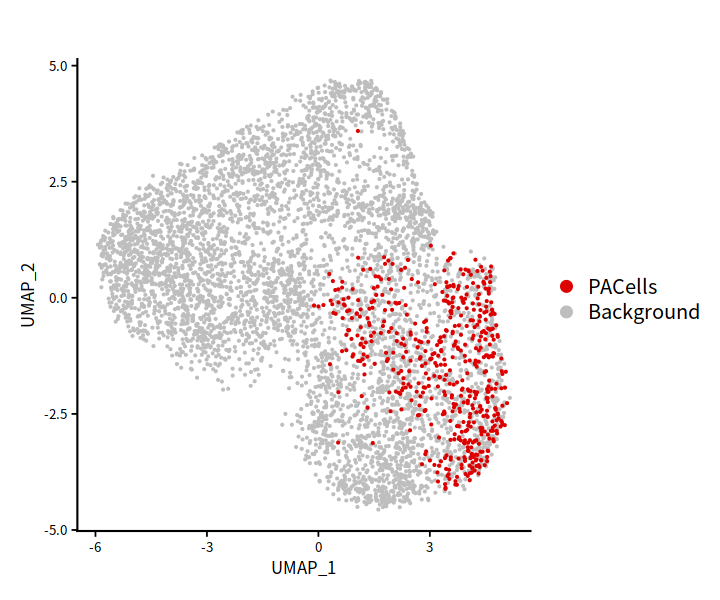

In [5]:
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(object = CLL_seurat, group.by = 'PACells_label', pt.size= .5,order=c("PACells","Background"))+
scale_colour_discrete(breaks=c("PACells","Background"), type= c("gray","#DC0000" ))+
labs(title = "") + 
theme(
       axis.line = element_line(color = 'black',size = 0.6),
    axis.title = element_text(size=10),
    axis.text= element_text(size=8),
    legend.title=element_text(size=10)
)

In [6]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.10

Matrix products: default
BLAS/LAPACK: /home/server/anaconda3/envs/JHTest1/lib/libopenblasp-r0.3.21.so

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=zh_CN.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=zh_CN.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] splines   stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.4.3                     BSgenome.Hsapiens.UCSC.hg19_1.4.3
 [3] BSgenome_1.64.0                   rtracklayer_1.56.1               
 [5] Biostrings_2.66.0                 XVecto